In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

## Task 1. Data preprocessed

In [77]:
# NN является регрессором
df = pd.read_csv('data/students_preprocessed.csv', sep = ',')
students_df = df[list(('school', 'sex', 'age', 'Pstatus', 'studytime', \
                                  'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', \
                                  'internet', 'absences', 'G1', 'G2', 'G3'))]

In [78]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   Pstatus     395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   schoolsup   395 non-null    int64
 7   famsup      395 non-null    int64
 8   paid        395 non-null    int64
 9   activities  395 non-null    int64
 10  higher      395 non-null    int64
 11  internet    395 non-null    int64
 12  absences    395 non-null    int64
 13  G1          395 non-null    int64
 14  G2          395 non-null    int64
 15  G3          395 non-null    int64
dtypes: int64(16)
memory usage: 49.5 KB


#### Данные корректны, можно преступать к разбиению данных на тестовую и обучающую выборки

In [79]:
X = students_df.drop('G3', axis = 1)
y = students_df.G3

### Разбиение данных на тестовую и обучающую выборки

In [80]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.25)

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Task 2. Network architecture

#### №1

In [83]:
# Входной слой - количество нейронов = количество объектов(столбцов)
# NN - регрессором => выходной слой имеет 1 нейрон
# Количество нейронов в скрытом слое = sqrt(395*1)
model1 = Sequential()

model1.add(Dense(395, input_dim=8, input_shape=(15,), activation="sigmoid"))
model1.add(Dense(20, activation='sigmoid'))
model1.add(Dense(1, activation='softmax'))

model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 395)               6320      
_________________________________________________________________
dense_64 (Dense)             (None, 20)                7920      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


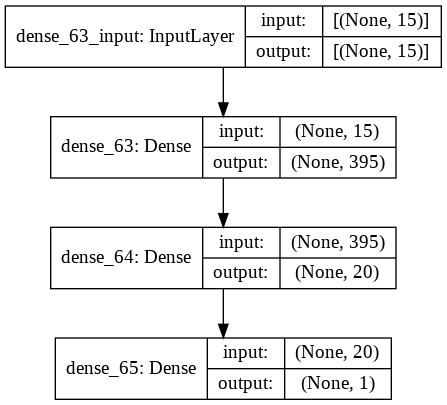

In [84]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [85]:
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [86]:
NN1 = model1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=32,
    batch_size=16
    )

Epoch 1/32
19/19 [==============================] - 1s 11ms/step - loss: -9.3744 - val_loss: -25.0228
Epoch 2/32
19/19 [==============================] - 0s 4ms/step - loss: -23.8051 - val_loss: -28.0963
Epoch 3/32
19/19 [==============================] - 0s 4ms/step - loss: -27.8576 - val_loss: -30.0348
Epoch 4/32
19/19 [==============================] - 0s 4ms/step - loss: -30.0254 - val_loss: -31.8248
Epoch 5/32
19/19 [==============================] - 0s 4ms/step - loss: -29.5838 - val_loss: -33.5464
Epoch 6/32
19/19 [==============================] - 0s 4ms/step - loss: -32.0163 - val_loss: -35.2686
Epoch 7/32
19/19 [==============================] - 0s 3ms/step - loss: -33.7675 - val_loss: -36.9933
Epoch 8/32
19/19 [==============================] - 0s 3ms/step - loss: -35.5625 - val_loss: -38.7112
Epoch 9/32
19/19 [==============================] - 0s 4ms/step - loss: -38.3248 - val_loss: -40.4056
Epoch 10/32
19/19 [==============================] - 0s 4ms/step - loss: -40.2279 

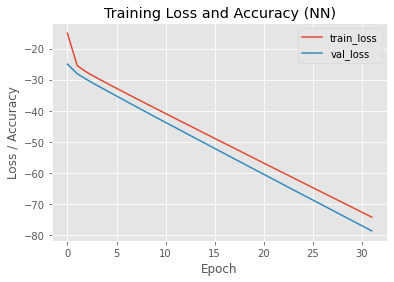

In [88]:
predictions = model1.predict(X_test, batch_size=32)
 
# Графики потерь и точности
N = np.arange(0, 32)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, NN1.history["loss"], label="train_loss")
plt.plot(N, NN1.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy (NN)")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()

In [132]:
model1.save('model_v1')

INFO:tensorflow:Assets written to: model_v1/assets


#### №2

In [93]:
# Входной слой - количество нейронов = количество объектов(столбцов)
# NN - регрессором => выходной слой имеет 1 нейрон
# Количество нейронов в скрытом слое = sqrt(395*1)
model2 = Sequential()

model2.add(Dense(395, input_dim=8, input_shape=(15,), activation="relu"))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 395)               6320      
_________________________________________________________________
dense_71 (Dense)             (None, 20)                7920      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


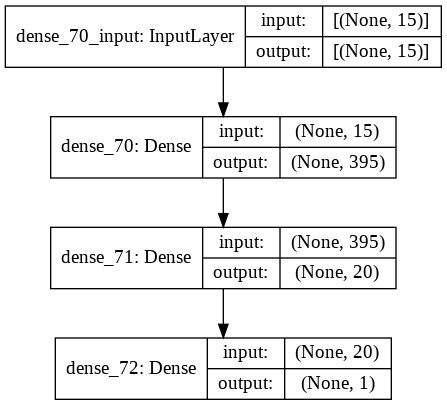

In [94]:
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [95]:
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [96]:
NN2 = model2.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=16,
    batch_size=32
    )

Epoch 1/16
10/10 [==============================] - 1s 20ms/step - loss: -6.4029 - val_loss: -19.0016
Epoch 2/16
10/10 [==============================] - 0s 6ms/step - loss: -24.8292 - val_loss: -42.6306
Epoch 3/16
10/10 [==============================] - 0s 6ms/step - loss: -50.2400 - val_loss: -75.0206
Epoch 4/16
10/10 [==============================] - 0s 7ms/step - loss: -84.0895 - val_loss: -120.1563
Epoch 5/16
10/10 [==============================] - 0s 6ms/step - loss: -131.4994 - val_loss: -183.1115
Epoch 6/16
10/10 [==============================] - 0s 5ms/step - loss: -203.0145 - val_loss: -270.4255
Epoch 7/16
10/10 [==============================] - 0s 5ms/step - loss: -297.4354 - val_loss: -388.1652
Epoch 8/16
10/10 [==============================] - 0s 6ms/step - loss: -407.9775 - val_loss: -541.6369
Epoch 9/16
10/10 [==============================] - 0s 5ms/step - loss: -590.3419 - val_loss: -746.2675
Epoch 10/16
10/10 [==============================] - 0s 5ms/step - loss

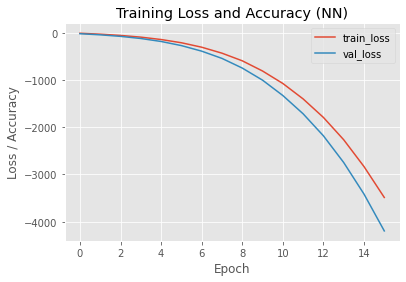

In [97]:
predictions = model2.predict(X_test, batch_size=32)
 
# Графики потерь и точности
N = np.arange(0, 16)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, NN2.history["loss"], label="train_loss")
plt.plot(N, NN2.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy (NN)")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()

In [133]:
model2.save('model_v2')

INFO:tensorflow:Assets written to: model_v2/assets


#### №3

In [127]:
# Входной слой - количество нейронов = количество объектов(столбцов)
# NN - регрессором => выходной слой имеет 1 нейрон
# Количество нейронов в скрытом слое = sqrt(395*1)
model3 = Sequential()

model3.add(Dense(395, input_dim=8, input_shape=(15,), activation="sigmoid"))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(1, activation='softmax'))

model3.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 395)               6320      
_________________________________________________________________
dense_95 (Dense)             (None, 20)                7920      
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


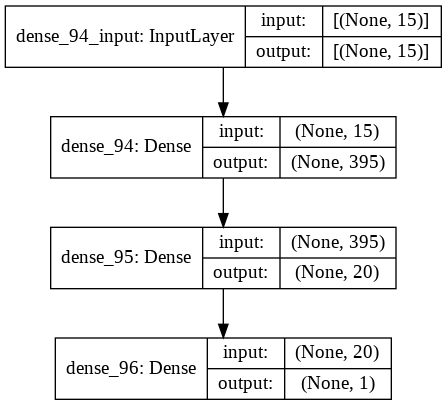

In [128]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [129]:
model3.compile(loss='binary_crossentropy', optimizer='adam')

In [130]:
NN3 = model3.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=32,
    batch_size=16
    )

Epoch 1/32
19/19 [==============================] - 1s 11ms/step - loss: -15.7726 - val_loss: -58.1209
Epoch 2/32
19/19 [==============================] - 0s 4ms/step - loss: -69.6758 - val_loss: -123.6049
Epoch 3/32
19/19 [==============================] - 0s 4ms/step - loss: -130.8041 - val_loss: -208.2662
Epoch 4/32
19/19 [==============================] - 0s 5ms/step - loss: -219.2131 - val_loss: -317.2018
Epoch 5/32
19/19 [==============================] - 0s 4ms/step - loss: -340.3864 - val_loss: -453.6261
Epoch 6/32
19/19 [==============================] - 0s 4ms/step - loss: -478.6705 - val_loss: -621.6932
Epoch 7/32
19/19 [==============================] - 0s 4ms/step - loss: -659.7804 - val_loss: -822.7193
Epoch 8/32
19/19 [==============================] - 0s 4ms/step - loss: -830.3687 - val_loss: -1060.8499
Epoch 9/32
19/19 [==============================] - 0s 4ms/step - loss: -1071.3741 - val_loss: -1341.8105
Epoch 10/32
19/19 [==============================] - 0s 4ms/ste

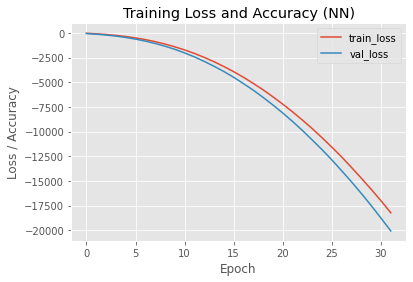

In [131]:
predictions = model3.predict(X_test, batch_size=32)
 
# Графики потерь и точности
N = np.arange(0, 32)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, NN3.history["loss"], label="train_loss")
plt.plot(N, NN3.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy (NN)")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()

In [134]:
model3.save('model_v3')

INFO:tensorflow:Assets written to: model_v3/assets
